In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("laptopPrice (2).csv")

# --- Data Preprocessing ---

# Remove 'GB' from columns and convert to numeric
for col in ['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']:
    df[col] = df[col].str.replace(' GB', '').astype(int)

# Convert 'rating' from string like '3 stars' to integer
df['rating'] = df['rating'].str.extract(r'(\d)').astype(float)

# Remove non-numeric values from 'weight' column
# (Assuming weight is misnamed and contains categories like 'Casual' - this column may need dropping)
df.drop(columns=['weight'], inplace=True)

# Encode binary features
df['Touchscreen'] = df['Touchscreen'].map({'Yes': 1, 'No': 0})
df['msoffice'] = df['msoffice'].map({'Yes': 1, 'No': 0})

# Drop features we can't use directly or are not helpful for regression
df.drop(columns=['brand', 'processor_name', 'warranty', 'os', 'os_bit'], inplace=True)

# Convert categorical processor_brand and ram_type using one-hot encoding
df = pd.get_dummies(df, columns=['processor_brand', 'ram_type', 'processor_gnrtn'])

# Drop rows with any missing values (just in case)
df.dropna(inplace=True)

# View processed data
df.head()


,ram_gb,ssd,hdd,graphic_card_gb,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,...,ram_type_LPDDR4,ram_type_LPDDR4X,processor_gnrtn_10th,processor_gnrtn_11th,processor_gnrtn_12th,processor_gnrtn_4th,processor_gnrtn_7th,processor_gnrtn_8th,processor_gnrtn_9th,processor_gnrtn_Not Available
0,4,0,1024,0,0,0,34649,2.0,3,0,...,False,False,True,False,False,False,False,False,False,False
1,4,0,1024,0,0,0,38999,3.0,65,5,...,False,False,True,False,False,False,False,False,False,False
2,4,0,1024,0,0,0,39999,3.0,8,1,...,False,False,True,False,False,False,False,False,False,False
3,8,512,0,2,0,0,69990,3.0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,4,0,512,0,0,0,26990,3.0,0,0,...,False,False,False,False,False,False,False,False,False,True


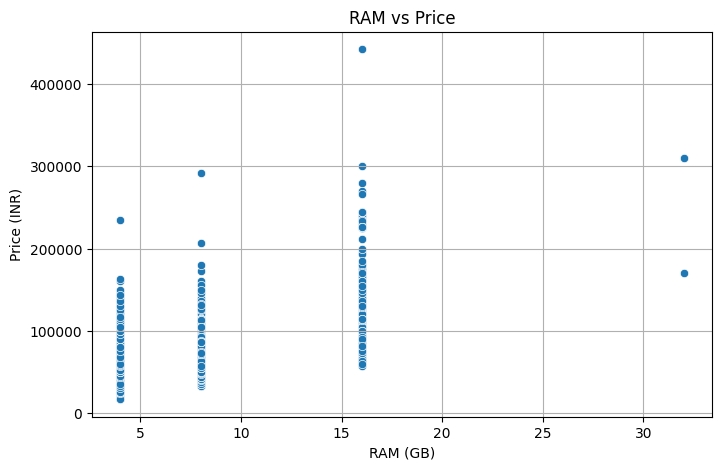

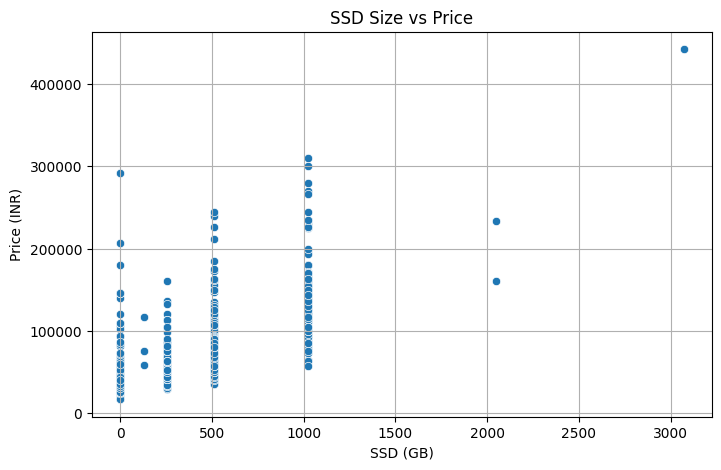

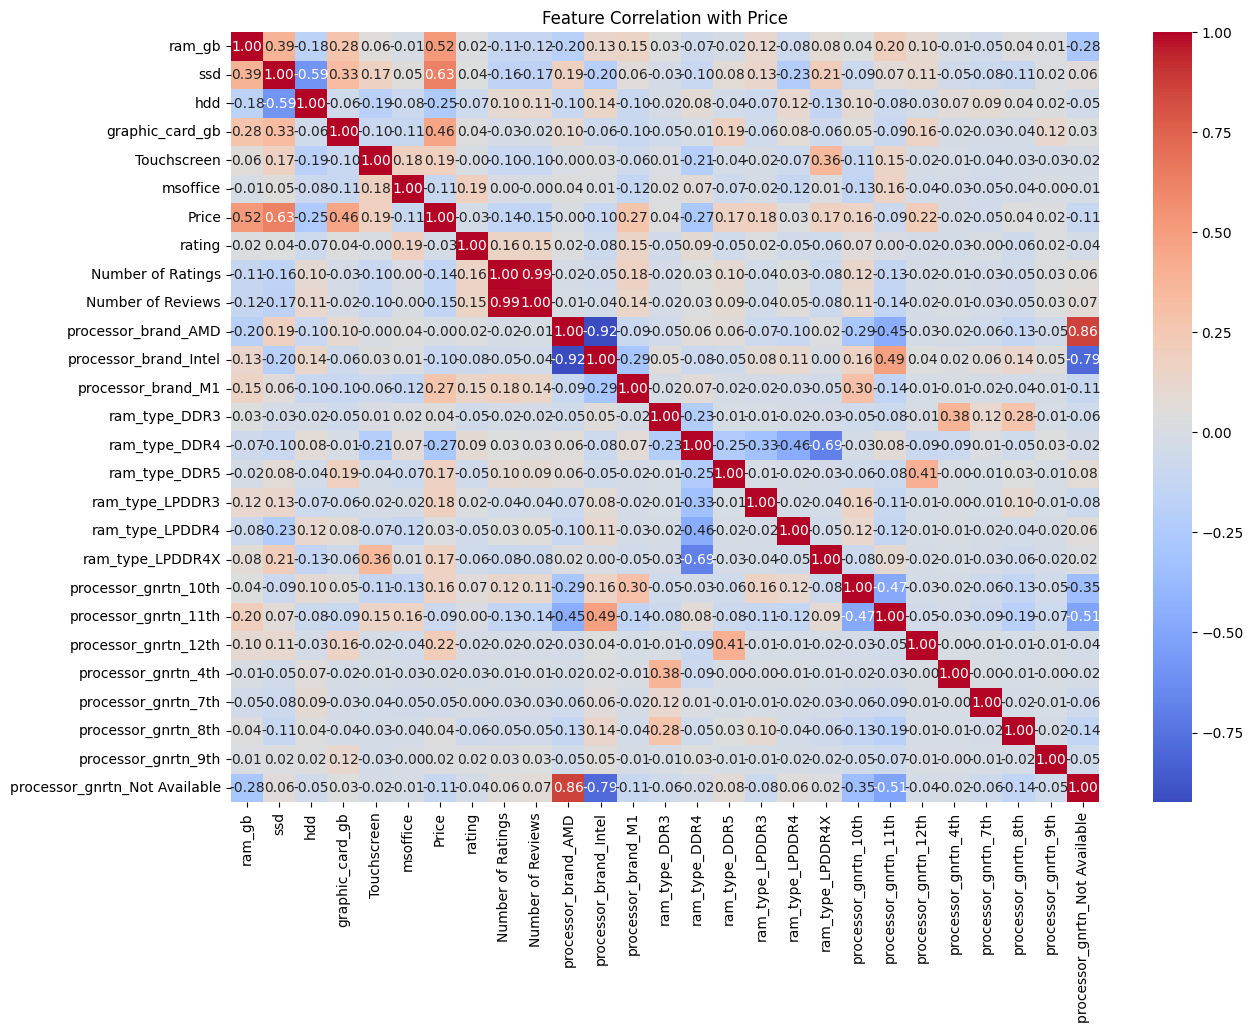

In [4]:
# Plot: RAM vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='ram_gb', y='Price')
plt.title('RAM vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

# Plot: SSD vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='ssd', y='Price')
plt.title('SSD Size vs Price')
plt.xlabel('SSD (GB)')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation with Price")
plt.show()


In [5]:
#linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.5583641821243952
RMSE: 29337.057532297298


In [6]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Binary target: High price (1) vs Low price (0)
median_price = df['Price'].median()
df['high_price'] = (df['Price'] > median_price).astype(int)

# New X and y
X = df.drop(columns=['Price', 'high_price'])
y = df['high_price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        85
           1       0.90      0.90      0.90        80

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165

Confusion Matrix:
 [[77  8]
 [ 8 72]]


C:\Users\chira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Save the processed DataFrame to a new CSV file
df.to_csv("cleaned_laptop_data.csv", index=False)
